In [31]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

In [11]:
# Load dataset
df = pd.read_csv("C:/Users/YST PC/Documents/Berkeley Cert/Capstone Project/dataset/hotel_bookings.csv")

In [12]:
# Step 3: Data Cleaning (basic)
df = df.dropna()  # Drop rows with missing values

In [15]:
# 4. Feature engineering – drop irrelevant columns
df = df.drop(['reservation_status_date', 'reservation_status', 'company', 'agent'], axis=1)

In [17]:
# 5. Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [19]:
# 6. Define feature variables (X) and target (y)
# Separates the input features (X) from the target variable (y), which indicates whether a booking was canceled (1) or not (0)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [21]:
# 7. Train/test split
# Splits the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# 8. Scale the features
# Normalizes all numeric features to have a mean of 0 and standard deviation of 1

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# 9. Train a KNN classifier
# Initializes the K-Nearest Neighbors classifier with 5 neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [27]:
# 10. Make predictions
y_pred = knn.predict(X_test_scaled)

In [35]:
# 11. Evaluate performance
acc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.9091
Mean Squared Error: 0.0909
Confusion Matrix:
 [[39  2]
 [ 2  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.33      0.33      0.33         3

    accuracy                           0.91        44
   macro avg       0.64      0.64      0.64        44
weighted avg       0.91      0.91      0.91        44



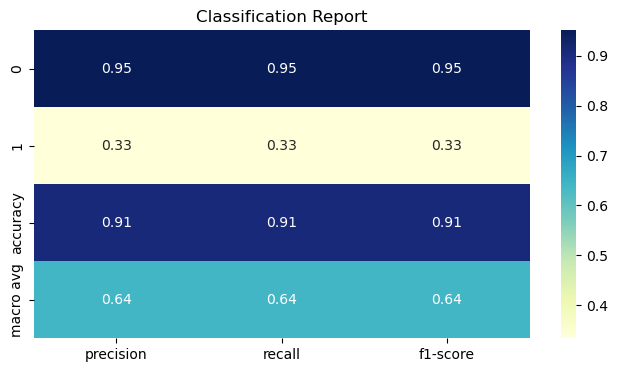

In [41]:
# Classification Report Heatmap
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Get classification report as dict and convert to DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Plot heatmap (only for precision, recall, and f1-score)
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='YlGnBu')
plt.title("Classification Report")
plt.show()